## Example 2

Import modules and configure matplotlib output to notebook.

In [1]:
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpim

import jonga
import xmpl

%matplotlib inline

Construct call tracer object set to filter out calls of functions/methods within module xmpl, with the effective function name constructed by replacing the initial 'xmpl.' with the empty string, and with groups defined by the first part (i.e. before the first '.') of the fully qualified name of the function *after* the string substitution

In [2]:
ct = jonga.CallTracer(srcmodflt='^xmpl', fnmsub=('^xmpl.', ''), grpflt='^[^\.]*')

Construct object from example class

In [3]:
c = xmpl.C()

Start call tracing

In [4]:
ct.start()

Construct object from example class

In [5]:
c.run()

Stop tracing

In [6]:
ct.stop()

Define font family specification string

In [7]:
fntfm = 'Vera Sans, DejaVu Sans, Liberation Sans, Arial, Helvetica, sans'

Get pygraphviz graph representation of method calls

In [8]:
g = ct.graph(fntsz=10, fntfm=fntfm)

Construct PNG format visualisation image of graph (SVG format would be a better choice,
but is more difficult to display in a notebook such as this).

In [9]:
png = g.draw(format='png')
bio = io.BytesIO()
bio.write(png)
bio.seek(0)
img = mpim.imread(bio)

Display graph

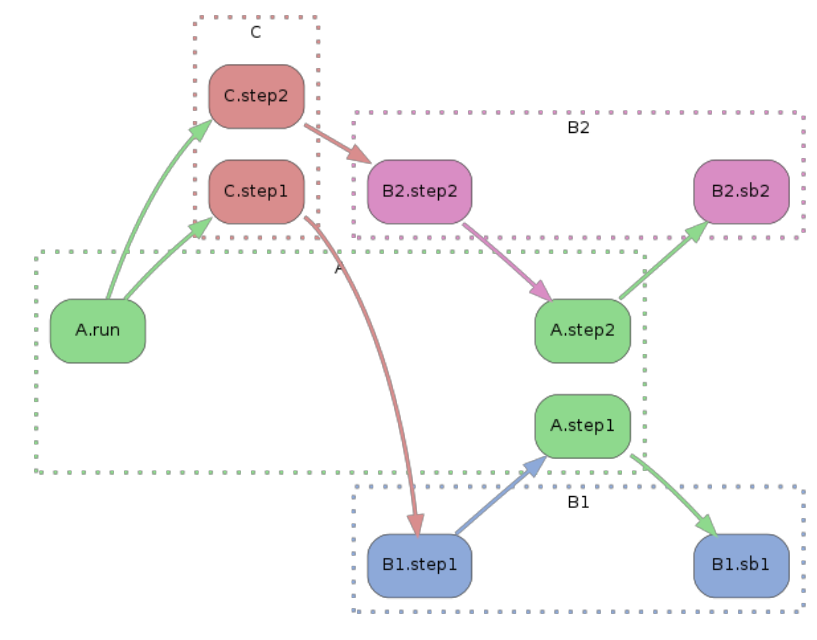

In [10]:
fig = plt.figure(figsize=(14,14))
axim = plt.imshow(img)
ax = plt.axis('off')
plt.show()

Define custom colour generation function by calling default colour generation function with different parameters

In [11]:
clrgen = lambda n : jonga.CallTracer._clrgen(n, 0.330, 0.330)

Generate and display graph using custom colours

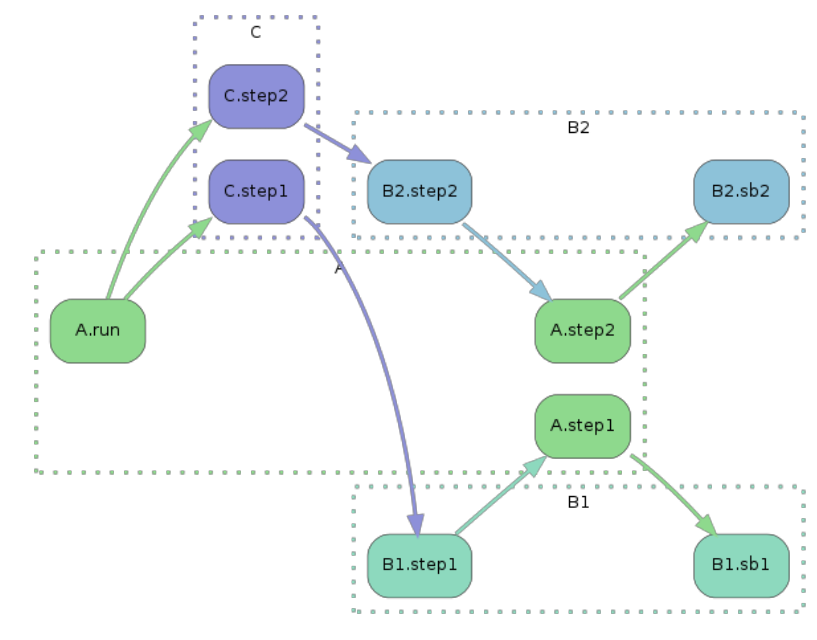

In [12]:
g = ct.graph(fntsz=10, fntfm=fntfm, clrgen=clrgen)

png = g.draw(format='png')
bio = io.BytesIO()
bio.write(png)
bio.seek(0)
img = mpim.imread(bio)

fig = plt.figure(figsize=(14,14))
axim = plt.imshow(img)
ax = plt.axis('off')
plt.show()